# Hospital Readmission Prediction using Logistic Regression

This project predicts whether a diabetic patient will be readmitted to a hospital within 30 days using logistic regression.

## Load and Explore Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('diabetic_data.csv')
print(data.shape)
data.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Cleaning

In [27]:
data = data.drop(columns=['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])
data.replace('?', np.nan, inplace=True)
data = data.dropna()  # Or handle with imputation

# Filter for binary readmission classification
data = data[data['readmitted'].isin(['<30', 'NO'])]
data['readmitted_binary'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

## Encoding Categorical Variables

In [29]:
# Drop columns with high cardinality or IDs
data = data.drop(columns=['readmitted', 'diag_1', 'diag_2', 'diag_3'])

# Convert object columns to categorical codes
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].astype('category').apply(lambda x: x.cat.codes)

## Feature Selection and Scaling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['readmitted_binary'])
y = data['readmitted_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        34
           1       0.29      0.17      0.21        12

    accuracy                           0.67        46
   macro avg       0.51      0.51      0.50        46
weighted avg       0.62      0.67      0.64        46



## Confusion Matrix and ROC Curve

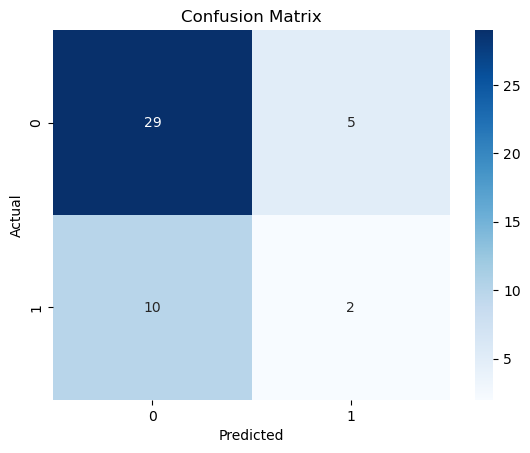

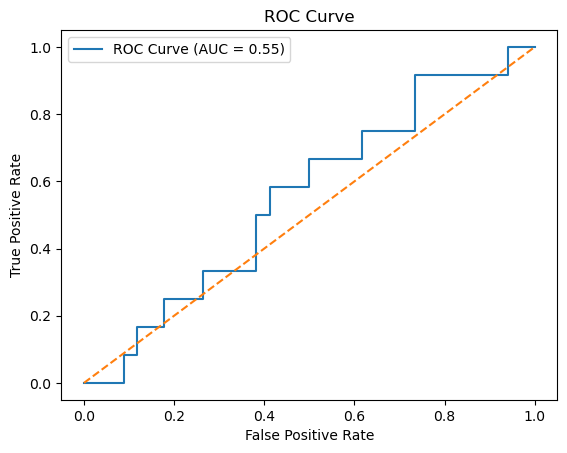

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()